In [10]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd

#　統計用ツール
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from patsy import dmatrices

#　自作の空間統計用ツール
from spatialstat import *

#描画
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot

# OLS

### 1 CSVをpandasで取り込む。

In [35]:
df = pd.read_csv('bukken_data.csv')

In [24]:
df = df[:][df['pay'] < 300000]

In [48]:
df.columns

Index(['apart_dummy', 'building_year', 'dk', 'fX', 'fY', 'floor', 'k', 'lk',
       'mansyon_dumy', 'new_dummy', 'pay', 'published_date', 'r', 'rc_dummy',
       'room_nums', 'sdk', 'sk', 'sldk', 'slk', 'south_direction_dummy',
       'square', 'teiki_syakuya_dummy', 'walk_minute_dummy'],
      dtype='object')

### 2 OLS推定

リストから回帰式を生成する関数。spatialstat内にあるのでimportすれば使える。

In [49]:
def fml_build(varlst):
    """
    Binding OLS formula from a list of variable names
    varlst: variable names, the 1st var should be endogeneouse variable
    """
    varlst.reverse()
    fml=varlst.pop()+'~'
    while len(varlst) != 0:
        fml=fml+'+'+varlst.pop()
    return fml

In [50]:
vars = ['pay', 'square', 'k', 'lk', 'dk', 'sdk', 'sldk', 'south_direction_dummy', 'building_year', 
        'new_dummy', 'mansyon_dumy', 'teiki_syakuya_dummy', 'walk_minute_dummy', 'r', 'rc_dummy', 'room_nums']
eq = fml_build(vars)

y, X = dmatrices(eq, data=df, return_type='dataframe')

logy = np.log(y)

model = sm.OLS(logy, X, intercept=True)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     453.8
Date:                Sun, 20 Nov 2016   Prob (F-statistic):               0.00
Time:                        18:05:56   Log-Likelihood:                 660.63
No. Observations:                1427   AIC:                            -1293.
Df Residuals:                    1413   BIC:                            -1220.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 5.64

なお空間統計でSEMを考えても、OLSやGLSは空間相関の有無に関わらず不偏であり、したがって汎化にはあまり関係ない。

時系列の系列相関用だが一応。空間相関の検出法については後述

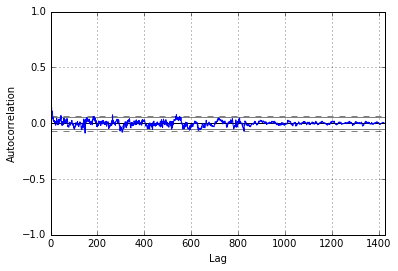

In [51]:
error = results.resid

# ADF test, H0: Non-stationary
tsa.adfuller(error, regression='nc')
 
# Autocorrel plot of resid
autocorrelation_plot(error) # Show ACF of residuals
ACF_resid=tsa.acf(error) # Keep ACF of residuals

OLSによる予測値。

In [52]:
results.predict()

array([ 11.63971598,  11.7000213 ,  11.71728911, ...,  11.55881281,
        11.73382293,  11.74532396])

In [53]:
pred = results.predict()

evl = df['pay'] - np.exp(pred)

In [54]:
evl

0        62482.080791
1        54425.717410
2        48325.582684
3       101934.754258
4        55432.534833
5        39425.717410
6       -10156.891428
7        11462.663055
8        -8926.192885
9       -17651.755132
10      -10680.469281
11      -12594.697488
12      -13294.822135
13      -13987.290275
14      -25775.089333
15      -13735.464761
16      -17188.044769
17      -12188.044769
18      -20223.518958
19      -15935.664751
20      -14663.023631
21      -13294.822135
22     -154644.473361
23        5340.019089
24        7340.019089
25        7511.678468
26     -124644.473361
27        -517.793654
28      -10585.774268
29        4506.845487
            ...      
1457     36053.773613
1458     26394.178831
1459    -17298.831612
1460     -4952.416268
1461      5401.338769
1462     19793.774034
1463     -8261.650060
1464    -52043.710532
1465     -1434.092000
1466    -32610.336058
1467    -27755.692080
1468    -28279.688984
1469     -6954.630638
1470      1796.550823
1471    -1

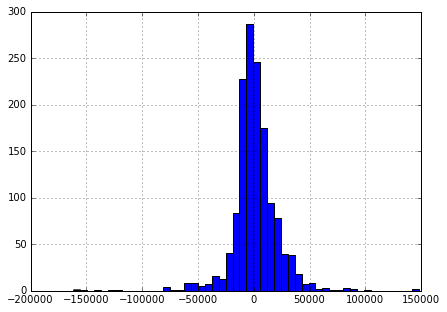

In [55]:
evl.hist(figsize=(7,5), bins=50)

In [56]:
print(evl.mean())
print(evl.std())

1098.8234646571307
20932.887025534183


In [39]:
a = df['pay'][df['pay'] > 4000000]

In [40]:
a.count()

0

In [45]:
df[:][df['pay'] < 300000]

,apart_dummy,building_year,dk,fX,fY,floor,k,lk,mansyon_dumy,new_dummy,...,rc_dummy,room_nums,sdk,sk,sldk,slk,south_direction_dummy,square,teiki_syakuya_dummy,walk_minute_dummy
0,0,42,0,35.655681,139.733959,3,1,0,1,0,...,0,3,0,0,0,0,0,41.81,0,3
1,0,42,1,35.655681,139.733959,3,0,0,1,1,...,0,3,0,0,0,0,0,41.82,0,3
2,0,42,1,35.655681,139.733959,3,0,0,1,0,...,0,3,0,0,0,0,0,41.82,0,3
3,0,42,0,35.655681,139.733959,2,0,0,1,1,...,0,1,0,0,0,0,0,33.00,0,3
4,0,42,0,35.655681,139.733959,3,0,0,1,0,...,0,3,0,0,0,0,0,41.82,0,3
5,0,42,1,35.655681,139.733959,3,0,0,1,1,...,0,3,0,0,0,0,0,41.82,0,3
6,0,39,0,35.656972,139.732992,7,0,0,1,1,...,1,2,0,0,0,0,1,53.69,0,2
7,0,39,0,35.656972,139.732992,2,0,0,1,1,...,1,1,0,0,0,0,1,48.14,0,2
8,0,39,0,35.656972,139.732992,4,0,0,1,1,...,1,1,0,0,0,0,1,40.00,0,2
9,0,39,0,35.656972,139.732992,5,0,0,1,1,...,1,1,0,0,0,0,0,42.00,0,2


In [130]:
df_by = pd.read_csv('bukken_data.csv')

In [131]:
df_by['building_year'][(df_by['building_year'] > 30)] = 1
df_by['building_year'][(df_by['building_year'] <= 30)] = 2
df_by['building_year'][(df_by['building_year'] <= 20)] = 3
df_by['building_year'][(df_by['building_year'] <= 15)] = 4
df_by['building_year'][(df_by['building_year'] <= 10)] = 5
df_by['building_year'][(df_by['building_year'] <= 5)] = 6

/Users/NIGG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/NIGG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/NIGG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/NIGG/anaconda/lib/python3.5/sit

In [132]:
by = pd.get_dummies(df_by['building_year'])

In [133]:
varname = []
for i in by.columns:
    for var in ['square', 'k', 'lk', 'dk', 'sdk', 'sldk', 'south_direction_dummy', 'mansyon_dumy', 'walk_minute_dummy', 'r', 'rc_dummy', 'room_nums']:
        df_by['{var}{i}'.format(**locals())] = by[i]*df_by[var]
        varname.append('{var}{i}'.format(**locals()))

In [134]:
vars = ['pay', 'square', 'k', 'lk', 'dk', 'sdk', 'sldk', 'south_direction_dummy', 'building_year', 
        'new_dummy', 'mansyon_dumy', 'teiki_syakuya_dummy', 'walk_minute_dummy', 'r', 'rc_dummy', 'room_nums'] + varname
eq = fml_build(vars)

y, X = dmatrices(eq, data=df_by, return_type='dataframe')

logy = np.log(y)

model = sm.OLS(logy, X, intercept=True)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     342.6
Date:                Wed, 23 Nov 2016   Prob (F-statistic):               0.00
Time:                        20:46:13   Log-Likelihood:                 189.50
No. Observations:                1489   AIC:                            -353.0
Df Residuals:                    1476   BIC:                            -284.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  0

In [102]:
varname

['square 0',
 'k 0',
 'lk 0',
 'dk 0',
 'sdk 0',
 'sldk 0',
 'south_direction_dummy 0',
 'new_dummy 0',
 'mansyon_dumy 0',
 'teiki_syakuya_dummy 0',
 'walk_minute_dummy 0',
 'r 0',
 'rc_dummy 0',
 'room_nums 0',
 'square 2',
 'k 2',
 'lk 2',
 'dk 2',
 'sdk 2',
 'sldk 2',
 'south_direction_dummy 2',
 'new_dummy 2',
 'mansyon_dumy 2',
 'teiki_syakuya_dummy 2',
 'walk_minute_dummy 2',
 'r 2',
 'rc_dummy 2',
 'room_nums 2',
 'square 3',
 'k 3',
 'lk 3',
 'dk 3',
 'sdk 3',
 'sldk 3',
 'south_direction_dummy 3',
 'new_dummy 3',
 'mansyon_dumy 3',
 'teiki_syakuya_dummy 3',
 'walk_minute_dummy 3',
 'r 3',
 'rc_dummy 3',
 'room_nums 3',
 'square 5',
 'k 5',
 'lk 5',
 'dk 5',
 'sdk 5',
 'sldk 5',
 'south_direction_dummy 5',
 'new_dummy 5',
 'mansyon_dumy 5',
 'teiki_syakuya_dummy 5',
 'walk_minute_dummy 5',
 'r 5',
 'rc_dummy 5',
 'room_nums 5',
 'square 6',
 'k 6',
 'lk 6',
 'dk 6',
 'sdk 6',
 'sldk 6',
 'south_direction_dummy 6',
 'new_dummy 6',
 'mansyon_dumy 6',
 'teiki_syakuya_dummy 6',
 'w

In [104]:
vars = ['pay', 'square', 'k', 'lk', 'dk', 'sdk', 'sldk', 'south_direction_dummy', 'building_year', 
        'new_dummy', 'mansyon_dumy', 'teiki_syakuya_dummy', 'walk_minute_dummy', 'r', 'rc_dummy', 'room_nums'] + varname
eq = fml_build(vars)

In [105]:
eq

'pay~+square+k+lk+dk+sdk+sldk+south_direction_dummy+building_year+new_dummy+mansyon_dumy+teiki_syakuya_dummy+walk_minute_dummy+r+rc_dummy+room_nums+square 0+k 0+lk 0+dk 0+sdk 0+sldk 0+south_direction_dummy 0+new_dummy 0+mansyon_dumy 0+teiki_syakuya_dummy 0+walk_minute_dummy 0+r 0+rc_dummy 0+room_nums 0+square 2+k 2+lk 2+dk 2+sdk 2+sldk 2+south_direction_dummy 2+new_dummy 2+mansyon_dumy 2+teiki_syakuya_dummy 2+walk_minute_dummy 2+r 2+rc_dummy 2+room_nums 2+square 3+k 3+lk 3+dk 3+sdk 3+sldk 3+south_direction_dummy 3+new_dummy 3+mansyon_dumy 3+teiki_syakuya_dummy 3+walk_minute_dummy 3+r 3+rc_dummy 3+room_nums 3+square 5+k 5+lk 5+dk 5+sdk 5+sldk 5+south_direction_dummy 5+new_dummy 5+mansyon_dumy 5+teiki_syakuya_dummy 5+walk_minute_dummy 5+r 5+rc_dummy 5+room_nums 5+square 6+k 6+lk 6+dk 6+sdk 6+sldk 6+south_direction_dummy 6+new_dummy 6+mansyon_dumy 6+teiki_syakuya_dummy 6+walk_minute_dummy 6+r 6+rc_dummy 6+room_nums 6+square 7+k 7+lk 7+dk 7+sdk 7+sldk 7+south_direction_dummy 7+new_dummy 7+

In [107]:
y, X = dmatrices(eq, data=df_by, return_type='dataframe')

SyntaxError: invalid syntax (<unknown>, line 1)

In [110]:
df_by['square 16']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1459    0
1460    0
1461    0
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    0
1469    0
1470    0
1471    0
1472    0
1473    0
1474    0
1475    0
1476    0
1477    0
1478    0
1479    0
1480    0
1481    0
1482    0
1483    0
1484    0
1485    0
1486    0
1487    0
1488    0
Name: square 16, dtype: float64